In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/CNN_Articels_clean.csv')

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Create an empty graph
G = nx.Graph()

# Load your dataset using pandas (replace 'your_dataset.csv' with the actual file name)
data = df

# Add nodes to the graph (each node represents a news article)
for index, row in data.iterrows():
    G.add_node(row["Index"])

# Compute text similarity and create edges
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["Article text"])
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i, article1 in data.iterrows():
    if(i > 500):
      break
    for j, article2 in data.iterrows():
        if i != j:
            # The similarity_matrix[i][j] represents the similarity between articles i and j
            similarity_score = similarity_matrix[i][j]
            if similarity_score > 0.3:  # You can adjust this threshold
                G.add_edge(article1["Index"], article2["Index"], weight=similarity_score)

# At this point, the graph 'G' is created with nodes and edges based on text similarity.

# You can explore the graph, apply clustering algorithms, or visualize it using NetworkX functions.

# For example, let's print the nodes and edges to verify the graph structure:
print("Nodes in the graph:", G.nodes())
print("Edges in the graph:", G.edges())

# Now you can apply clustering algorithms to 'G' to group related articles.


Nodes in the graph: [0, 2, 3, 4, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 49, 51, 53, 54, 55, 56, 57, 59, 61, 63, 65, 67, 69, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 94, 96, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 156, 158, 159, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 174, 176, 177, 179, 180, 182, 184, 186, 188, 189, 191, 192, 197, 199, 201, 202, 203, 204, 208, 209, 210, 211, 212, 214, 216, 218, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 317, 31

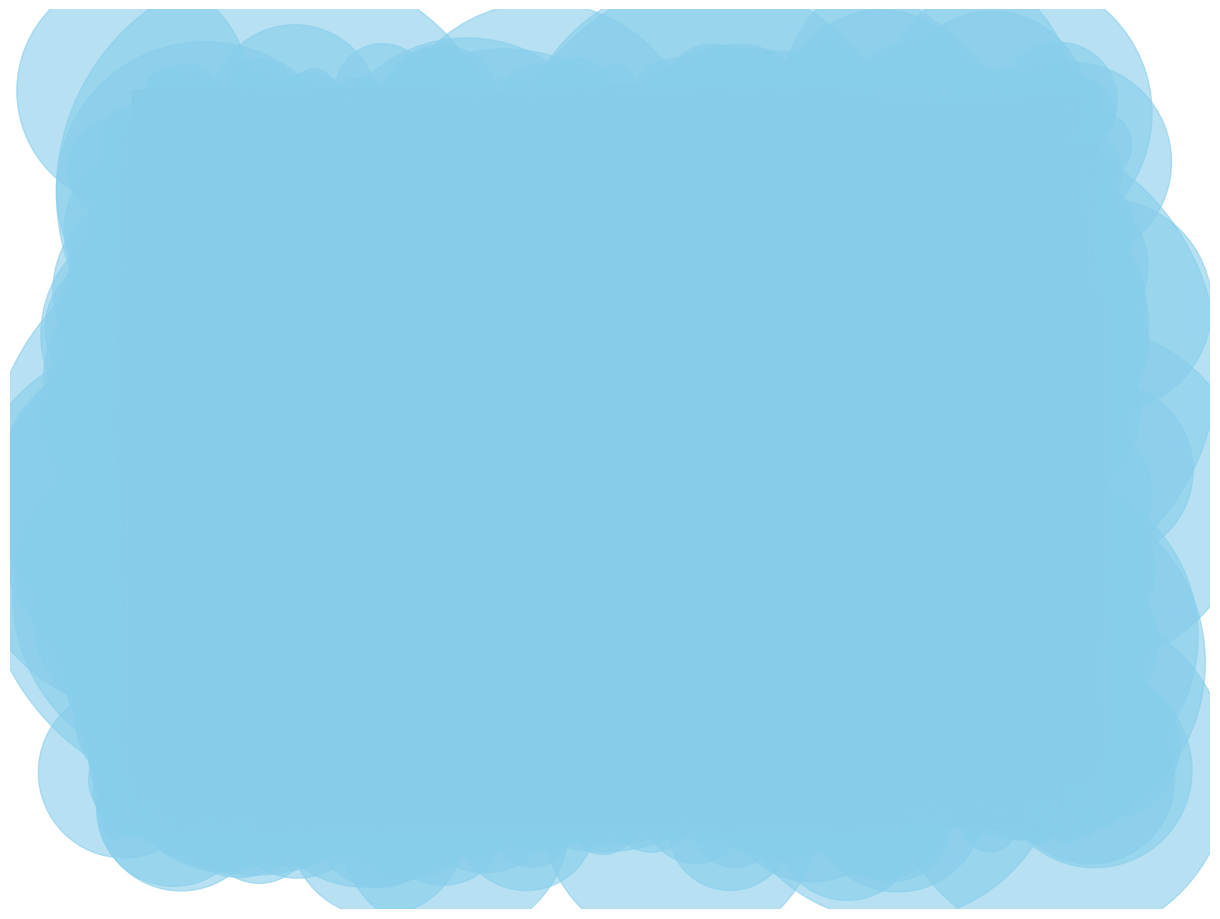

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Load your dataset using pandas (replace 'your_dataset.csv' with the actual file name)
data = df

# Add nodes to the graph (each node represents a news article)
for index, row in data.iterrows():
    G.add_node(row["Index"])

# Compute text similarity and create edges
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["Article text"])
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i, article1 in data.iterrows():
    if i > 500:
        break
    for j, article2 in data.iterrows():
        if i != j:
            # The similarity_matrix[i][j] represents the similarity between articles i and j
            similarity_score = similarity_matrix[i][j]
            if similarity_score > 0.3:  # You can adjust this threshold
                G.add_edge(article1["Index"], article2["Index"], weight=similarity_score)

# At this point, the graph 'G' is created with nodes and edges based on text similarity.

# You can explore the graph, apply clustering algorithms, or visualize it using NetworkX functions.

# Visualization: Given a large graph, you might want to apply some layout algorithm to reduce clutter.
# We can use a random layout as an example.
layout = nx.random_layout(G)

# You can adjust the figure size based on your needs.
plt.figure(figsize=(12, 9))

# Draw nodes with their size based on node degree.
node_sizes = [len(list(G.neighbors(node))) * 100 for node in G.nodes()]
nx.draw(G, layout, with_labels=False, node_size=node_sizes, node_color='skyblue', alpha=0.6, font_size=8)

# You can adjust the edge width based on edge weights.
edge_weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
edge_widths = [(weight * 5) for weight in edge_weights]

# Use a different edge style and color for better visibility.
nx.draw_networkx_edges(G, layout, width=edge_widths, edge_color='darkgray', alpha=0.5, style='dashed')

plt.axis('off')
plt.show()

# Now you can apply clustering algorithms to 'G' to group related articles.
